# [데이터분석]
- 기존데이터에서 패턴을 찾고 미래의 데이터를 예측하거나 분류하는 것
- 머신러닝(정형데이터분석) - 기존의 통계학적에 기반한 ML, 인공신경망(텐서플로우) 기반의 ML
- 딥러닝(비정형데이터분석)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import warnings
warnings.filterwarnings('ignore')

## Part1[기술통계]
- P.82~
- 평균

In [2]:
a = [1,1,1,12] # 15/4
b = [3,5,3,4] # 15/4
suma, sumb = 0,0
# 평균
for amean, bmean in zip(a,b):
    suma+=amean
    sumb+=bmean
print(suma/len(a))
print(sumb/len(b))

3.75
3.75


In [3]:
a=[1,2,3,4,5]
round(len(a)/2,0) # 홀수

2.0

- 중앙값

In [4]:
# 중앙값(전체데이터를 오름차순으로 만들고 그 갯수의 가운데값, 짝수일때는 n/2 왼쪽과 오른쪽값의 합/2)
a = [1,1,1,12] 
b = [3,3,4,5] 
def median(var): # 원칙적으로는 sort함수도 작성해야 함
    center = int(len(var)/2)
    
    if len(var)%2==0:
        print((var[center-1]+var[center])/2) # 짝수
    else:
        print(var[center])

median(a)

1.0


- 최빈값

In [20]:
# 최빈값(전체데이터에서 가장 빈도수가 많은 값)
a = [1,1,1,12] # 결과는 1
b = [3,3,4,5] # 결과는 3

aCount = [3, 3, 3, 1]
bCount = [2, 2, 1, 1]

aCountMax=3; aCountMaxindex=1; aCountMaxindexValue=1

def Freq(var): # 최빈값 함수
    varCount = [var.count(i) for i in var]

    print (var[varCount.index(max(varCount))])

Freq(b)

3


- 분산 $\sigma^2=\sum_{i=1}^n(X_i-\mu)^2/N$
- 표준편차 $\sigma=\sqrt{\sum_{i=1}^n(X_i-\mu)^2/N}$

In [10]:
# 표준편차 
print(np.var(a), np.std(a)) # 분산, 표준편차

print(np.var(b), np.std(b))

22.6875 4.763139720814412
0.6875 0.82915619758885


In [23]:
df = pd.read_csv('auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [24]:
df.describe() # 3, 4번째 데이터의 분산이 큼

,0,1,2,4,5,6,7
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


- 표본분산 $\sigma^2=\sum_{i=1}^n(X_i-\mu)^2/(N-1)$
- 표본표준편차 $\sigma=\sqrt{\sum_{i=1}^n(X_i-\mu)^2/(N-1)}$

In [28]:
a = [1,1,1,12]

print(np.mean(a), np.std(a)) # 모집단 (전체데이터 개수로 나눔)
tmp = pd.DataFrame(a)
tmp.describe() # 표본집단(전체데이터 개수(n) -1로 나눔)

3.75 4.763139720814412


,0
count,4.00
mean,3.75
std,5.50
min,1.00
25%,1.00
50%,1.00
75%,3.75
max,12.00


In [31]:
# ddof=1이면 표본집단, 0은 모집단
# 넘파이는 기본 모표준편차, 판다스는 기본 표본표준편차

print(np.mean(a), np.std(a, ddof=1), np.std(a,ddof=0))

tmp.std(), tmp.std(ddof=0) # ddof=0으로 하면 모집단으로 계산함.

3.75 5.5 4.763139720814412
0    5.5
dtype: float64 0    4.76314
dtype: float64


In [32]:
a1 = np.array(a)/10
np.mean(a), np.mean(a1)

(3.75, 0.375)

In [33]:
np.var(a), np.var(a1) # 숫자값을 스케일링하면 단위만 바뀜.

(22.6875, 0.226875)

- 상관계수

In [34]:
# 교재 97페이지의 상관계수
# 예측과 회귀에 사용되는 결과값(y, 레이블)과 연관성 있는 특징값(x값)을 미리 선별해야 함
df.corr()

,0,1,2,4,5,6,7
0,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
1,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
2,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
4,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
5,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
6,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
7,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [37]:
df[[7,5]].corr()

,7,5
7,1.000000,0.205873
5,0.205873,1.000000


In [38]:
df[7_1]=df[7]/100
df[5_1]=df[5]/100
df[[7_1,5_1]].corr() # 상관계수는 숫자값을 스케일링한 후에 사용하여도 된다.(값의 단위에 영향을 받지 않음.)

,71,51
71,1.000000,0.205873
51,0.205873,1.000000


In [1]:
# 데이터분석 작업을 진행할때는 데이터간의 연관성과 패턴을 분석하는 것이라서
# 데이터의 범위를 일정한 범위로 줄여서 작업해도 됨(스케일링)
x = [1,2,3,4]
y = [1,2,3,4]

np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

In [3]:
x = [1,2,3,4]
y = [10,20,30,40]

np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

In [6]:
y = [1, 1.2, 1.1, 1.0]

np.corrcoef(x,y)

array([[ 1.        , -0.13483997],
       [-0.13483997,  1.        ]])

- 히스토그램

In [73]:
## 교재 102페이지
df = pd.read_excel('남북한발전전력량.xlsx')
df.head(6)

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,2852,3065,3225,3421,3646,3812,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,61,61,56,42,53,69,59,52,52,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,1195,1302,1518,1689,1821,1859,2056,2127,2272,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,897,1031,1090,1121,1191,1297,1307,1468,1487,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,170,186,194,202,190,196,206,215,225,236,255,235,237,211,215,221,216,190,239


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [48]:
df = df.iloc[[0,5], 3:]
df.index = ['sou', 'nor']
#df.columns = df.columns.map(int) # 열 이름의 자료형을 정수로 변경
df.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
sou,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,2852,3065,3225,3421,3646,3812,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
nor,263,247,221,231,230,213,193,170,186,194,202,190,196,206,215,225,236,255,235,237,211,215,221,216,190,239


In [49]:
tdf = df.T

In [50]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 1991 to 2016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sou     26 non-null     object
 1   nor     26 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [51]:
tdf = tdf.astype('int32') # 데이터 타입을 정수형으로 변경
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 1991 to 2016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sou     26 non-null     int32
 1   nor     26 non-null     int32
dtypes: int32(2)
memory usage: 1.7+ KB


In [52]:
# 상관계수를 구하고 차트를 작성
# 남한의 전력량과 북한의 전력량의 상관도
tdf.corr()

,sou,nor
sou,1.000000,0.023844
nor,0.023844,1.000000


count      26.000000
mean     3363.307692
std      1393.900191
min      1186.000000
25%      2175.750000
50%      3323.000000
75%      4644.250000
max      5404.000000
Name: sou, dtype: float64


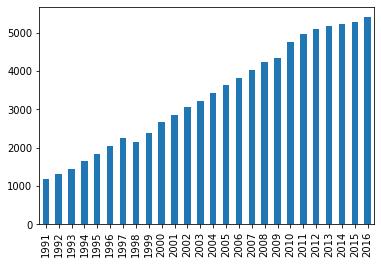

In [54]:
# 1991~2016년도의 전력량은 편차가 심함
# 한 시점에서 급격하게 증가하지 않고 꾸준히 전력량이 증가함.(한 시점에 급격하게 증각한 경우는 중위수가 작음.)
print(tdf.sou.describe())
tdf.sou.plot(kind='bar')
plt.show()

count     26.000000
mean     216.807692
std       22.864854
min      170.000000
25%      197.500000
50%      215.500000
75%      234.000000
max      263.000000
Name: nor, dtype: float64


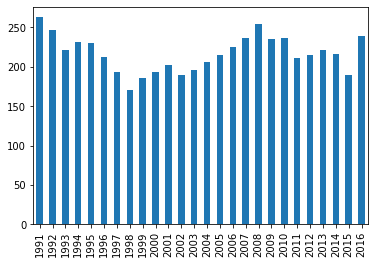

In [55]:
# 1991~2016년도의 전력량은 크게 편차가 없음.(std값이 남한에 비해서 작음)
print(tdf.nor.describe())
tdf.nor.plot(kind='bar')
plt.show()

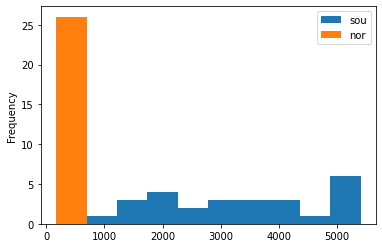

In [56]:
tdf.plot(kind='hist')
plt.show()

- Box Plot

,x
0,False
1,False
2,False
3,False
4,False
5,False


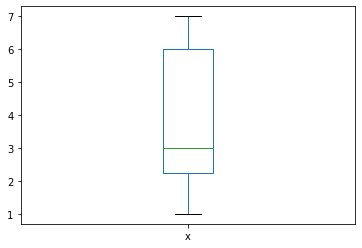

In [75]:
tmp=[1,2,3,3,7,7]

tmp=pd.DataFrame({'x':tmp})

tmp.plot(kind='box')
tmp.describe()


# 25%범위수 계산
Q1=tmp.quantile(0.25)
Q1


# 75%범위수 계산
Q3=tmp.quantile(0.75)
Q3


IQR=Q3-Q1 # 사분위수 범위

# 25%지점의 1.5 지점 아래 있거나,75%지점의 1.5 초과 지점에 있는 자료
re=(tmp<Q1-1.5*IQR)| (tmp>Q3+1.5*IQR) # 이상치 없음
re